# Object Detection - part-1

# 1. Template Matching

Template matching is a object detection algorithm where the larger image was scanned for a provided template by sliding the template across the image 

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
full = cv2.imread('../DATA/sammy.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

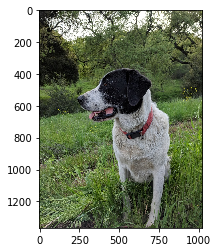

In [4]:
plt.imshow(full)

### Template Image

A subset of the image. Note how its actually the exact image. Later on we'll discuss more advanced methods for general matching, such as facial recognition.

**Note:
You can use this object detection technique only if you know the exact size of the image to have to detect in the larger image.

In [5]:
face= cv2.imread('../DATA/sammy_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

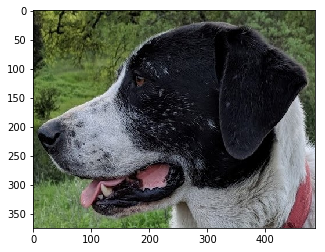

In [6]:
plt.imshow(face)

In [7]:
height, width,channels = face.shape

In [8]:
height

375

In [9]:
# The Full Image to Search
full = cv2.imread('../DATA/sammy.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)


# The Template to Match
face= cv2.imread('../DATA/sammy_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)


# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

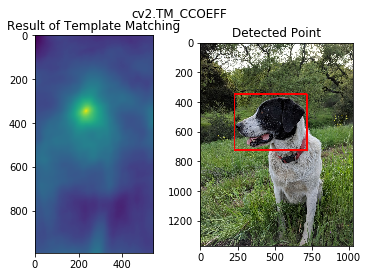

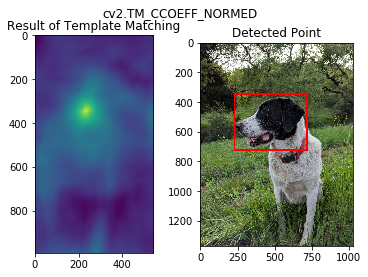

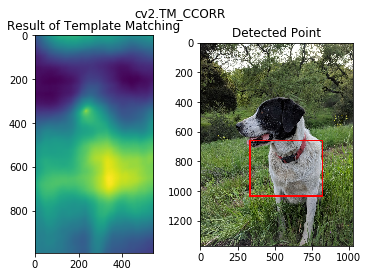

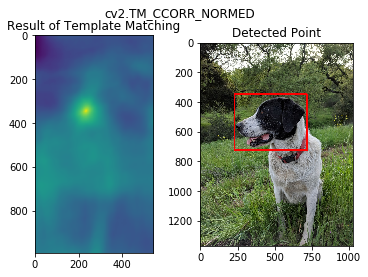

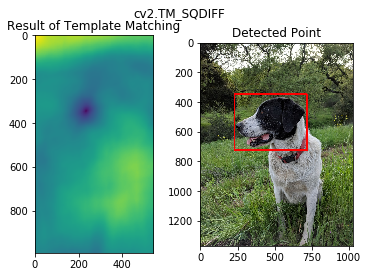

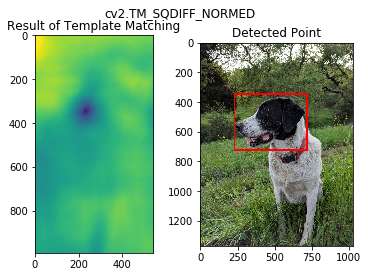

In [10]:
for m in methods:
    
    # Create a copy of the image
    full_copy = full.copy()
    
    # Get the actual function instead of the string
    method = eval(m)

    # Apply template Matching with the method
    res = cv2.matchTemplate(full_copy,face,method)
    
    # Grab the Max and Min values, plus their locations
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # Set up drawing of Rectangle
    
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    # Notice the coloring on the last 2 left hand side images.
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc    
    else:
        top_left = max_loc
        
    # Assign the Bottom Right of the rectangle
    bottom_right = (top_left[0] + width, top_left[1] + height)

    # Draw the Red Rectangle
    cv2.rectangle(full_copy,top_left, bottom_right, 255, 10)

    # Plot the Images
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Result of Template Matching')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detected Point')
    plt.suptitle(m)
    
    
    plt.show()
    print('\n')
    print('\n')
    

# 2. Corner Detection

The basic idea is that the corner can be detected by looking for significant change in all directions.

The direction would be the direction where there is more change.

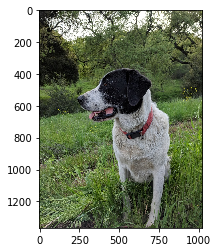

In [11]:
plt.imshow(full)

## Harris Corner Detection

**cornerHarris Function**

*  src Input single-channel 8-bit or floating-point image.
*  dst Image to store the Harris detector responses. It has the type CV_32FC1 and the same size as src .
*  blockSize Neighborhood size (see the details on #cornerEigenValsAndVecs ).
*  ksize Aperture parameter for the Sobel operator.
*  k Harris detector free parameter. See the formula in DocString
*  borderType Pixel extrapolation method. See #BorderTypes.

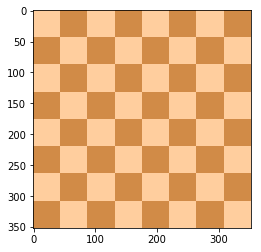

In [18]:
flat_chess = cv2.imread('../DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)
plt.imshow(flat_chess)

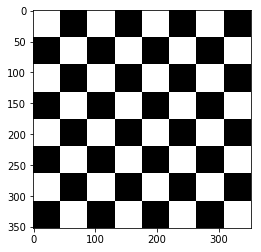

In [19]:
gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_flat_chess,cmap='gray')

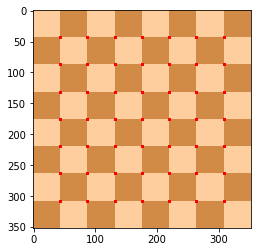

In [20]:
# Convert Gray Scale Image to Float Values
gray = np.float32(gray_flat_chess)

# Corner Harris Detection
#blocksize= size of the marker of the corners detected
#ksize = kernel size of sobel operation
dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)

# result is dilated for marking the corners, not important to actual corner detection
# this is just so we can plot out the points on the image shown
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
flat_chess[dst>0.05*dst.max()]=[255,0,0]

plt.imshow(flat_chess)

Other than tis the edge features can be extracted by cv2 function

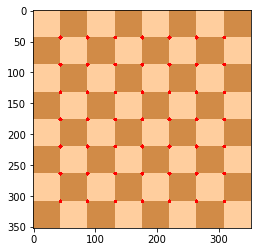

In [23]:
# Need to reset the images since we drew on them
flat_chess = cv2.imread('../DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)
gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)


corners = cv2.goodFeaturesToTrack(gray_flat_chess,maxCorners=60,
                                  qualityLevel=0.01,minDistance=10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(flat_chess,(x,y),3,255,-1)

plt.imshow(flat_chess)

# 3. Edge Detection

## Canny Detector

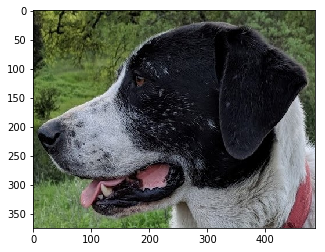

In [24]:
plt.imshow(face)

In [26]:
edges = cv2.Canny(image=face, threshold1=127, threshold2=127)

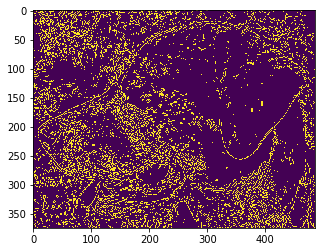

In [27]:
plt.imshow(edges)

To detect only important edges blur the image first

In [31]:
blurred_img = cv2.blur(face,ksize=(5,5))
# Calculate the median pixel value
med_val = np.median(face) 

# Lower bound is either 0 or 70% of the median value, whichever is higher
lower = int(max(0, 0.7* med_val))

# Upper bound is either 255 or 30% above the median value, whichever is lower
upper = int(min(255,1.3 * med_val))

edges = cv2.Canny(image=blurred_img, threshold1=lower , threshold2=upper+50)

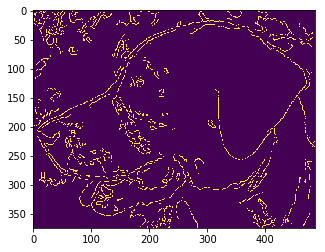

In [32]:
plt.imshow(edges)

**Application of Canny Detector as Border removal**

The white backqround is a border

In [104]:
from skimage.feature import canny

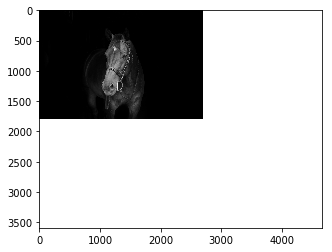

In [105]:
image = cv2.imread('../DATA/horse.jpg',0)
plt.imshow(image, cmap='gray')

In [106]:
def remove_borders(img, canny_img):
    """ Your implementation instead of the following one"""   
     #dx = int(img.shape[1] * 0.05) 
    for di in range(canny_img.shape[0]):
        if(np.sum(canny_img[di,:]==True)):
            break
            
    for dj in range(canny_img.shape[0]-1, 0, -1):
        if(np.sum(canny_img[dj,:]==True)):
            break
            
    for dk in range(canny_img.shape[1]):
        if(np.sum(canny_img[:,dk]==True)):
            break
            
    for dl in range(canny_img.shape[1]-1, 0, -1):
        if(np.sum(canny_img[:,dl]==True)):
            break
        
    tolerance = 20 
    print(di,dj,dk,dl)
    return img[di+tolerance:dj-tolerance, dk+tolerance:dl-tolerance]

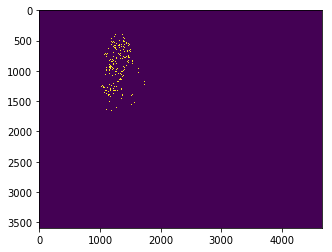

In [107]:
canny_image = canny(image)
plt.imshow(canny_image)

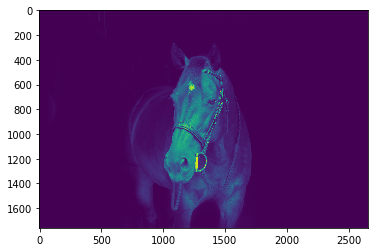

In [109]:
plt.imshow(rm)

# 5. Contour Detection

## External vs Internal Contours

In [110]:
img = cv2.imread('../DATA/internal_external.png',0)

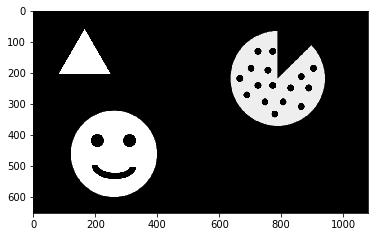

In [111]:
plt.imshow(img,cmap='gray')

In [114]:
image,contours, hierarchy= cv2.findContours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

The hierarchy has 3 different values
-1 --- external contours
4 ---- internal contours 1
0 ---- internal contours 2

In [115]:
# Set up empty array
external_contours = np.zeros(img.shape)

# For every entry in contours
for i in range(len(contours)):
    
    # last column in the array is -1 if an external contour (no contours inside of it)
    if hierarchy[0][i][3] == -1:
        
        # We can now draw the external contours from the list of contours
        cv2.drawContours(external_contours, contours, i, 255, -1)

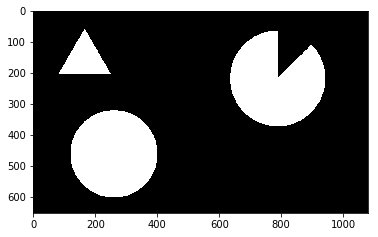

In [116]:
plt.imshow(external_contours,cmap='gray')

In [117]:
# Create empty array to hold internal contours
image_internal = np.zeros(img.shape)

# Iterate through list of contour arrays
for i in range(len(contours)):
    # If third column value is NOT equal to -1 than its internal
    if hierarchy[0][i][3] != -1:
        
        # Draw the Contour
        cv2.drawContours(image_internal, contours, i, 255, -1)
        

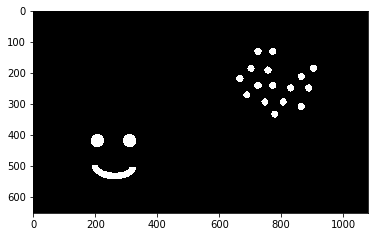

In [118]:
plt.imshow(image_internal,cmap='gray')

In [119]:
# Create empty array to hold internal contours
image_internal = np.zeros(img.shape)

# Iterate through list of contour arrays
for i in range(len(contours)):
    # If third column value is NOT equal to -1 than its internal
    if hierarchy[0][i][3] == 4:
        
        # Draw the Contour
        cv2.drawContours(image_internal, contours, i, 255, -1)
        

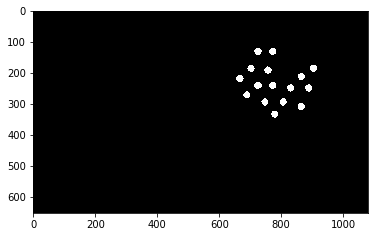

In [120]:
plt.imshow(image_internal,cmap='gray')